### Строим кривые второго порядка, меняя коэффициенты основного уравнения

In [68]:
from sympy import *
var('A,B,C,D,E,F')
var('x,y')
eq = Function('eq')(x,y)
eq = A*x*x + 2*B*x*y + C*y*y + D*x + E*y + F
Consts = {A: 2, B: -3, C: 1, D: -2, E: 0, F:-1}
def f(t):
    return solve(eq.subs(Consts),y)[0].subs(x,t),solve(eq.subs(Consts),y)[1].subs(x,t)



In [69]:
from matplotlib import *
n = 100
xe = [-1 + 0.05*i for i in range (n)]
f_x = [f(xe[i])[0] for i in range(n)]
f2_x = [f(xe[i])[1] for i in range(n)]
# z = [0 for i in range(n)]

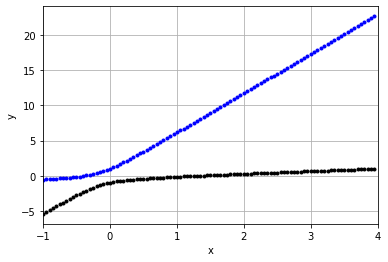

In [70]:
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,4])
plt.plot(xe,f_x,'k.')
plt.plot(xe,f2_x,'b.')

In [71]:
Consts = {A: 0.5, B: 0, C: -0.5, D:0, E:0,F: -1}
eq.subs(Consts)
def f(t):
    return solve(eq.subs(Consts),y)[0].subs(x,t),solve(eq.subs(Consts),y)[1].subs(x,t)


In [76]:
### здесь мы строим мнимые числа только (по приколу)
n = 100
xe = [-1 + 0.05*i for i in range (n)]
# f_x = [complex(f(xe[i])[0]).real for i in range(n)]
# f2_x = [complex(f(xe[i])[1]).real for i in range(n)]
### видно, что берем .imag - мнимую часть числа
f3_x = [complex(f(xe[i])[0]).imag for i in range(n)]
f4_x = [complex(f(xe[i])[1]).imag for i in range(n)]
# z = [0 for i in range(n)]

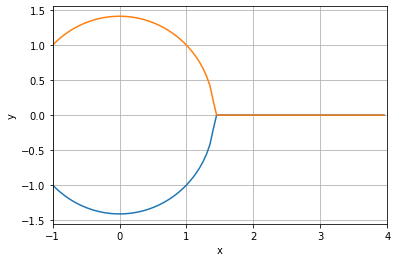

In [78]:
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,4])
plt.plot(xe,f3_x,)
plt.plot(xe,f4_x)
### действительная часть дала бы параболу, а мнимая дала эллип

### Лента Мебиуса

(-1.0, 1.0)

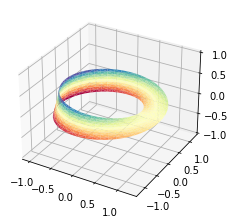

In [64]:
import numpy as np
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(0.5))
# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)

### Матрицы

In [102]:
import numpy as np
A = np.zeros((3,3))
for i in range(3):
#     A[i][i] = 1
    A[i,i] = 2
B = np.arange(9).reshape(3,3)

In [103]:
C = A.dot(B).dot(A).dot(A.transpose())

In [105]:
A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [110]:
C = np.array([[2,2,2],[3,3,3],[4,4,4]],dtype = str)

In [111]:
C

array([['2', '2', '2'],
       ['3', '3', '3'],
       ['4', '4', '4']], dtype='<U1')

In [112]:
C = np.array([[2,2,2],[3,3,3],[4,4,4]],dtype = complex)

In [113]:
C

array([[2.+0.j, 2.+0.j, 2.+0.j],
       [3.+0.j, 3.+0.j, 3.+0.j],
       [4.+0.j, 4.+0.j, 4.+0.j]])

In [114]:
C[0]

array([2.+0.j, 2.+0.j, 2.+0.j])

In [115]:
C[0][1:]

array([2.+0.j, 2.+0.j])

### Функция разложения в степенной ряд

In [117]:
from sympy import *
var('x')
### фрактал от числа
def fac(n):
    if n == 0:
        return 1
    return fac(n-1)*n
### функция, возвращающая степенной ряд
def wew(func,n,x0): ### func - функция, которую хотим разложить, n - количество членов ряда, которое вернет функция,
    ### x0 - точка, в которой раскладываем в ряд Тейлора
    res = func.subs(x,x0)
    for i in range(n):
        f = diff(func,x,i+1).subs(x,x0)
        res += f/fac(i+1)*(x-x0)**(i+1)
    return res

In [125]:
wew(cos(x),20,0)

x**20/2432902008176640000 - x**18/6402373705728000 + x**16/20922789888000 - x**14/87178291200 + x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

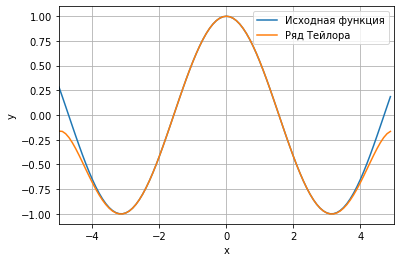

In [140]:
### построим график исходной функции и наложим полученный степенной ряд
x1 = [-5 + 0.1*i for i in range(100)]
f1 = [cos(x1[i]) for i in range(100)]
fff = wew(cos(x),10,0)
f2 = [fff.subs(x,x1[i]) for i in range(100)]
plt.grid()
plt.xlabel('x')
plt.xlim([-5,5])
plt.ylabel('y')
plt.plot(x1,f1,label = 'Исходная функция')
plt.plot(x1,f2,label = 'Ряд Тейлора')
plt.legend()